In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly
plt.style.use('ggplot')

%matplotlib inline

# Read in .csv file

In [2]:
data = pd.read_csv('bluenile_n.csv',parse_dates=['date'])

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',None)

In [160]:
data.columns

Index(['product_name', 'avg_rating', 'side_stone_weight', 'metal', 'user_name',
       'verified', 'stars', 'price', 'date', 'location', 'expert_consulted',
       'recommended', 'why_buy', 'popular', 'color', 'gold', 'is_usa'],
      dtype='object')

In [161]:
data.shape

(12826, 17)

In [5]:
np.sum(data.isnull())

product_name            0
avg_rating            144
side_stone_weight       0
metal                   0
user_name             144
verified              144
stars                 144
price                   0
date                  144
location             9360
expert_consulted     5057
recommended          8558
why_buy              9660
dtype: int64

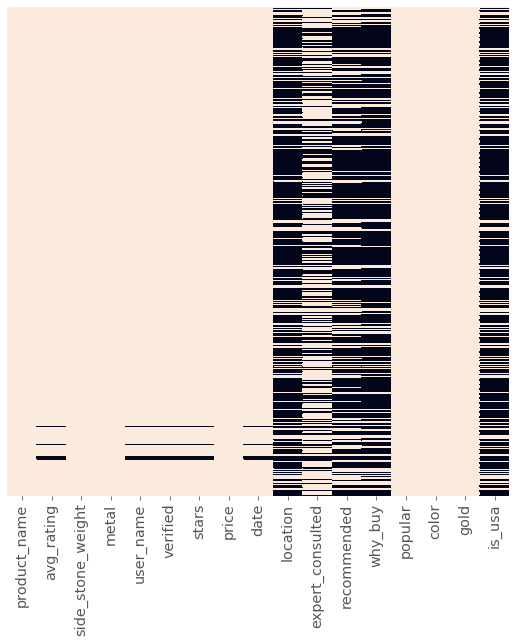

In [162]:
def plot_null_matrix(df,figsize = (9,9)):
    plt.figure(figsize = figsize)
    df_null = df.isnull()
    sns.heatmap(~df_null, cbar=False, yticklabels = False)
    plt.xticks(rotation = 90, size = 'x-large')
    plt.show()

plot_null_matrix(data)

## Handling missing data 

In [7]:
# data[data['metal'].isnull()]
data.loc[data['metal'].isnull(),'metal'] = '18K YELLOW GOLD'
data.loc[(data['product_name']=='Riviera Cathedral Pavé Diamond Engagement Ring in 18k Yellow Gold (1/2 ct. tw.)')& 
         (data['metal']=='18K YELLOW GOLD'),'side_stone_weight'] = 0.5

In [8]:
data.loc[data['product_name']=='Riviera Cathedral Pavé Diamond Engagement Ring in 18k Yellow Gold (1/2 ct. tw.)', 'product_name'] = 'Riviera Cathedral Pavé Diamond Engagement Ring'
data[data['product_name']=='Riviera Cathedral Pavé Diamond Engagement Ring']

,product_name,avg_rating,side_stone_weight,metal,user_name,verified,stars,price,date,location,expert_consulted,recommended,why_buy
5812,Riviera Cathedral Pavé Diamond Engagement Ring,4.7,0.5,14k White Gold,Matthew D.,Verified Buyer,5.0,1690,2020-07-17,"Slidell, USA",yes,Yes,Value
5813,Riviera Cathedral Pavé Diamond Engagement Ring,4.7,0.5,14k White Gold,Jeremy E.,Verified Buyer,5.0,1690,2020-07-01,"MERRILLVILLE, USA",yes,Yes,Quality
5814,Riviera Cathedral Pavé Diamond Engagement Ring,4.7,0.5,14k White Gold,Brody C.,Verified Buyer,5.0,1690,2020-06-08,"LISBON, USA",yes,Yes,Value
5815,Riviera Cathedral Pavé Diamond Engagement Ring,4.7,0.5,14k White Gold,MICHAEL C.,Verified Buyer,5.0,1690,2020-05-23,"WAVERLY, USA",yes,Yes,GIA graded diamonds
5816,Riviera Cathedral Pavé Diamond Engagement Ring,4.7,0.5,14k White Gold,Ricardo R.,Verified Buyer,3.0,1690,2020-04-22,"Brooklyn, USA",yes,Yes,Quality
5817,Riviera Cathedral Pavé Diamond Engagement Ring,4.7,0.5,14k White Gold,Michael R.,Verified Buyer,5.0,1690,2019-12-03,"GLASSBORO, USA",yes,Yes,Value
5818,Riviera Cathedral Pavé Diamond Engagement Ring,4.7,0.5,14k White Gold,Mark R.,Verified Buyer,5.0,1690,2019-11-12,"RANCHO CUCAMONGA, USA",yes,Yes,Value
5819,Riviera Cathedral Pavé Diamond Engagement Ring,4.7,0.5,14k White Gold,Patrick B.,Verified Buyer,5.0,1690,2019-11-05,"BURKE, USA",no,Yes,Value
5820,Riviera Cathedral Pavé Diamond Engagement Ring,4.7,0.5,14k White Gold,Andrew D.,Verified Buyer,5.0,1690,2019-11-05,"Republic, USA",yes,Yes,Value
5821,Riviera Cathedral Pavé Diamond Engagement Ring,4.7,0.5,14k White Gold,Jose R.,Verified Buyer,5.0,1690,2019-10-02,"BRENTWOOD, USA",yes,Yes,Value


In [9]:
data['verified'].value_counts()

Verified Buyer    12536
Non                 149
Name: verified, dtype: int64

In [10]:
data.groupby(['verified'])['avg_rating','stars'].agg(['mean','std','min','max'])

C:\Users\Chun\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



avg_rating                         stars                    
                     mean       std  min  max      mean       std  min  max
verified                                                                   
Non              4.804698  0.087252  4.6  5.0  4.885906  0.358868  3.0  5.0
Verified Buyer   4.791417  0.099427  3.0  5.0  4.786694  0.505701  1.0  5.0

## Reaserch  Questions:

### 1. What kind of engagement ring styles are popular on BuleNile.com?
    
    - What kind of gold is more popular?
    - Designs with or without side stone settings are more popular?
    - What price range are the best sellers at?
    - Have Customers choice changed over time?
    - Any difference in perference between segment groups?

### 2.What are the other factors contribute to sales?

    - Do customers rate popular styles higher too?
    - Does reason of buying differ for popular and non popular styles? 
    - Any pattern changed over time? Has COVID-19 influenced the business?


## Research Goal: provide insights for production and sales team:
    
    1. Designers and Buyers: Do we have enough stock?
    2. What should be emphasized in marketing?


## Assumptions

1. The reviews are fair representation of selling.

   One review equals one sale.
   The more popular a style is, the heavier weight the style has in all sort of analysis.


2. The reviews are geniue and valid resources to reflect customers' true opinion on the product.

   This might not be the case since engagement rings are expensive purchases. It is more likely for a unsatisfied customer to return the purchase rather than keep it and complaint online, therefore we don't really see much of the dislikes from customers. But at least we can find out about what the good things customers like about the brand and the product.




### Define the popular styles

For each styles, there could several diffrent type of gold options, such as 14K White Gold, 18K Gold, or Platinum.

The top 10 most popular styles consist of 6260 rows of data, roughly is 48.8% of all 12829 data rows. There for we identify these ten styles as the "popular styles" in the analysis.

There are 144 styles have no review data. In this case, we assume they are all 'non-popular'.

Add a column in data frame, where the popular styles are 'True', and the non-popular styles are 'False'.


In [11]:
data['product_name'].unique().shape

(303,)

In [12]:
np.sum(data['product_name'].value_counts().nlargest(10))/data.shape[0]

0.48795697248421543

In [14]:
data['product_name'].value_counts().nlargest(10)
popular_styles = ['Classic Six-Prong Solitaire Engagement Ring',
                  'Classic Four Prong Solitaire Engagement Ring',
                  'Classic Four-Prong Solitaire Engagement Ring',
                  'Petite Solitaire Engagement Ring',
                  'Classic Comfort Fit Solitaire Engagement Ring',
                  'Tapered Cathedral Solitaire Engagement Ring',
                  'Petite Micropavé Diamond Engagement Ring',
                  'Petite Cathedral Solitaire Engagement Ring',
                  'Petite Diamond Engagement Ring',
                  'Petite Pavé Diamond Engagement Ring']
data.loc[data['product_name'].isin(popular_styles),'popular'] = 'popular'
data.loc[~data['product_name'].isin(popular_styles),'popular'] = 'non-popular'
data['popular'].value_counts()

non-popular    6569
popular        6260
Name: popular, dtype: int64

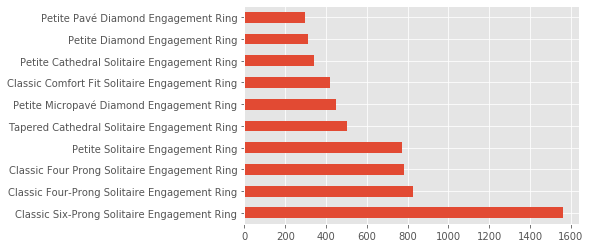

In [15]:
top_10 = data['product_name'].value_counts().nlargest(10)
top_10.plot.barh()

### Q1.1 What kind of gold is more popular?

In [22]:
data['metal'].value_counts()
# data['metal'] = data['metal'].str.strip()
# data['metal'] = data['metal'].str.lower()
# data['metal'] = data['metal'].str.replace(r'\(\d\.?\d?mm\)','')
# data.loc[data['metal'] == 'platinum (1/3 ct tw.)','side_stone_weight'] = 1/3
# data.loc[data['metal'] == 'platinum (1/3 ct tw.)','metal'] = 'platinum'
# data.loc[data['metal'] == '14k white gold (1/4 ct. tw)','side_stone_weight'] = 0.25
# data.loc[data['metal'] == '14k white gold (1/4 ct. tw)','metal'] = '14k white gold'
# data.loc[data['metal'] == '14k white gold (1/8 ct. wt.)','side_stone_weight'] = 0.125
# data.loc[data['metal'] == '14k white gold (1/8 ct. wt.)','metal'] = '14k white gold'
# data.loc[data['metal'] == '14k white gold (3/8 ct. wt.)','side_stone_weight'] = 0.375
# data.loc[data['metal'] == '14k white gold (3/8 ct. wt.)','metal'] = '14k white gold'
# data.loc[data['metal'] == '14k white gold (1/4 ctw.)','side_stone_weight'] = 0.25
# data.loc[data['metal'] == '14k white gold (1/4 ctw.)','metal'] = '14k white gold'
# data.loc[data['metal'] == '14k rose gold (1/3 ct tw.)','side_stone_weight'] = 1/3
# data.loc[data['metal'] == '14k rose gold (1/3 ct tw.)','metal'] = '14k rose gold'
# data.loc[data['metal'] == '14k rose gold (1/4 ctw.)','side_stone_weight'] = 0.25
# data.loc[data['metal'] == '14k rose gold (1/4 ctw.)','metal'] = '14k rose gold'
# data.loc[data['metal'] == 'platinum (1/4 ctw.)','side_stone_weight'] = 0.25
# data.loc[data['metal'] == 'platinum (1/4 ctw.)','metal'] = 'platinum'
# data.loc[data['metal'] == 'platinum (1 ct.tw)','side_stone_weight'] = 1
# data.loc[data['metal'] == 'platinum (1 ct.tw)','metal'] = 'platinum'
# data.loc[data['metal'] == '18k yellow gold (1/4 ctw.)','side_stone_weight'] = 0.25
# data.loc[data['metal'] == '18k yellow gold (1/4 ctw.)','metal'] = '18k yellow gold'
# data.loc[data['metal'] == 'diamond bridge detail 14k white gold','metal'] = '14k white gold'
# data.loc[data['metal'] == 'halo 14k white gold','metal'] = '14k white gold'
# data.loc[data['metal'] == 'twisted band diamond engagement ring platinum'] = 'platinum'
# data.loc[data['metal'] == 'milgradetail 14k yellow gold'] = '14k yellow gold'
# data.loc[data['metal'] == 'twisted band diamond engagement ring 14k rose gold'] = '14k rose gold'
# data['metal'] = data['metal'].str.replace('milgradetail 14k white gold','14k white gold')
# data['metal'] = data['metal'].str.replace('diamond accents platinum ','platinum ')
# data['metal'] = data['metal'].str.replace('twisted band diamond engagement ring 14k yellow gold','14k yellow gold')
# data['metal'] = data['metal'].str.replace('twisted band diamond engagement ring 14k white gold','14k white gold')
# data['metal'] = data['metal'].str.replace('trillion sidestones platinum','platinum')
# data['metal'] = data['metal'].str.replace('diamond accents 18k rose gold','18k rose gold')
# data['metal'] = data['metal'].str.replace('platinum 18k rose gold and pink diamond details','platinum 18k rose gold')
# data['metal'] = data['metal'].str.replace('baguette sidestones 14k white gold','14k white gold')
# data['metal'] = data['metal'].str.replace('diamond bridge detail 14k yellow gold','14k yellow gold')
# data['metal'] = data['metal'].str.replace('diamond accents platinum','platinum')


platinum                        5231
14k white gold                  4770
18k white gold                  1317
18k yellow gold                  718
14k rose gold                    382
14k yellow gold                  343
14k white and rose gold           30
18k rose gold                     24
14k white and yellow gold         12
platinum 18k rose gold             1
platinum and 18k yellow gold       1
Name: metal, dtype: int64

In [23]:
white_color = data['metal'].isin(['platinum','14k white gold','18k white gold'])
data.loc[white_color,'color'] = 'white'
yellow_color =  data['metal'].isin(['14k yellow gold','18k yellow gold'])
data.loc[yellow_color,'color'] = 'yellow'
rose_color = data['metal'].isin(['14k rose gold','18k rose gold'])
data.loc[rose_color,'color'] = 'rose'
mix_color = data['metal'].isin(['14k white and rose gold','14k white and yellow gold','platinum and 18k yellow gold','platinum 18k rose gold'])
data.loc[mix_color,'color'] = 'mix'

In [24]:
data.loc[data['metal']=='platinum', 'gold'] = 'platinum'
platinum_mix = ['platinum and 18k yellow gold','platinum 18k rose gold']
data.loc[data['metal'].isin(platinum_mix), 'gold'] = 'platinum_mix'
data.loc[data['metal'].str.contains('14k'), 'gold'] = '14k'
data.loc[data['metal'].str.contains('18k'), 'gold'] = '18k'

In [25]:
data['color'].value_counts()
# data['gold'].value_counts()

white     11318
yellow     1061
rose        406
mix          44
Name: color, dtype: int64

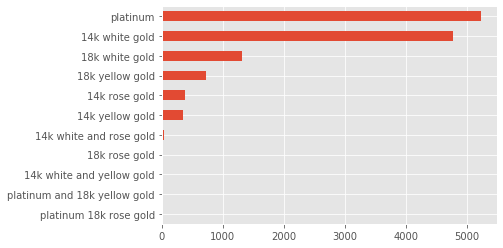

In [26]:
data['metal'].value_counts().sort_values().plot(kind='barh')

In [129]:
styles = data[['product_name','gold','color','side_stone_weight','price','avg_rating']]
unique_styles = styles[~styles.duplicated()]
unique_styles

,product_name,gold,color,side_stone_weight,price,avg_rating
0,Petite Twist Diamond Engagement Ring,14k,white,0.1,1190,4.8
141,Riviera Pavé Diamond Engagement Ring,14k,white,0.166667,850,4.8
277,French Pavé Diamond Engagement Ring,14k,white,0.25,1250,4.8
372,Riviera Pavé Diamond Engagement Ring,platinum,white,0.166667,1290,4.7
462,Classic Six-Prong Solitaire Engagement Ring,platinum,white,0,650,4.8
1097,Petite Twist Diamond Engagement Ring,platinum,white,0.1,1550,4.9
1188,Scalloped Pavé Diamond Engagement Ring,platinum,white,0.375,1890,4.9
1266,Petite Solitaire Engagement Ring,platinum,white,0,830,4.8
1503,Blue Nile Studio Petite French Pavé Crown Diam...,platinum,white,0.333333,2790,4.9
1565,Petite Cathedral Solitaire Engagement Ring,platinum,white,0,830,4.7


In [173]:
unique_styles['gold'].value_counts(normalize=True).sort_values().index

Index(['18k', 'platinum', '14k'], dtype='object')

No handles with labels found to put in legend.


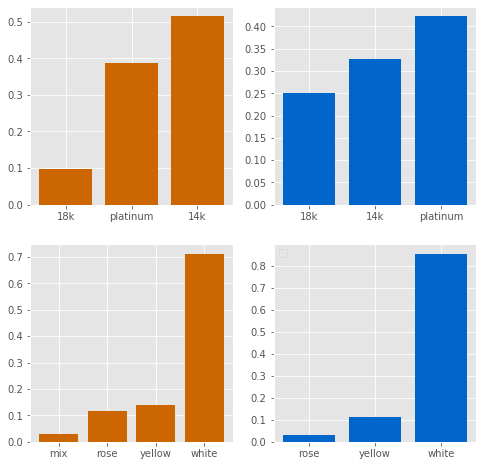

In [190]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
ax1.bar(unique_styles['gold'].value_counts(normalize=True).sort_values().index,unique_styles['gold'].value_counts(normalize=True).sort_values(),color='#CC6600')
ax2.bar(popular['gold'].value_counts(normalize=True).sort_values().index,popular['gold'].value_counts(normalize=True).sort_values(),color='#0066CC')
ax3.bar(unique_styles['color'].value_counts(normalize=True).sort_values().index,unique_styles['color'].value_counts(normalize=True).sort_values(),color='#CC6600')
ax4.bar(popular['color'].value_counts(normalize=True).sort_values().index,popular['color'].value_counts(normalize=True).sort_values(),color = '#0066CC')
plt.legend()

Text(0, 0.5, 'percentage')

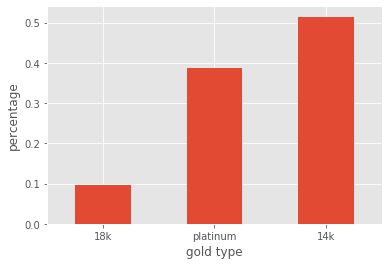

In [165]:
unique_styles['gold'].value_counts(normalize=True).sort_values().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('gold type')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

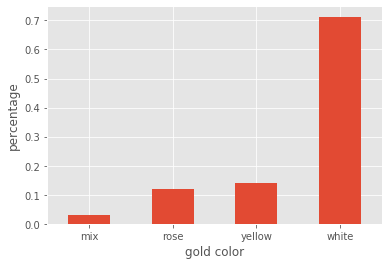

In [167]:
unique_styles['color'].value_counts(normalize=True).sort_values().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('gold color')
plt.ylabel('percentage')

In general, the brand provide more style options in 14K(over 50%), however, among the popular styles, customers favor the platinum more, over 40% sales are platinum bands.

Text(0, 0.5, 'percentage')

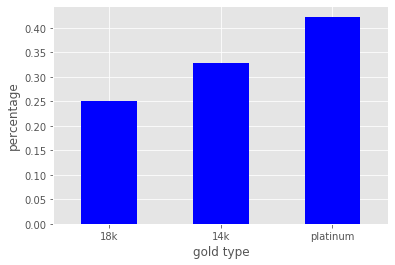

In [168]:
popular = data[data['popular'] == 'popular']
non_popular = data[data['popular'] == 'non_popular']
popular['gold'].value_counts(normalize=True).sort_values().plot(kind='bar',color='b')
plt.xticks(rotation=0)
plt.xlabel('gold type')
plt.ylabel('percentage')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

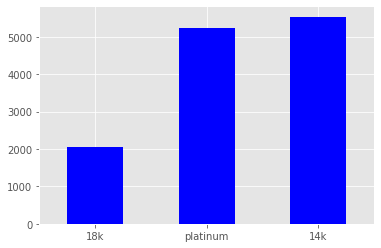

In [32]:
data['gold'].value_counts(normalize=True).sort_values().plot(kind='bar',color='b')
plt.xticks(rotation=0)
plt.xlabel('gold type')
plt.ylabel('percentage')

Text(0, 0.5, 'percentage')

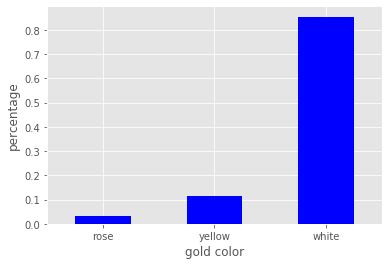

In [169]:
popular['color'].value_counts(normalize=True).sort_values().plot(kind='bar',color='b')
plt.xticks(rotation=0)
plt.xlabel('gold color')
plt.ylabel('percentage')

## Q1.2 Which is more popular: with or without side stones?

In [212]:
popular['side_stone_weight'].value_counts()

0.00    5201
0.10     761
0.25     298
Name: side_stone_weight, dtype: int64

In [39]:
# data[data['side_stone_weight']=='14k rose gold'] 11819
# data[data['side_stone_weight']=='platinum'] 11800
# data[data['side_stone_weight']=='14k yellow gold'] 11483
# data.drop(index=[11819,11800,11483],inplace=True)

In [40]:
data.loc[data['side_stone_weight']==0.333333,'side_stone_weight'] = 1/3

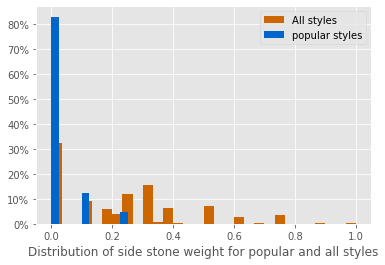

In [218]:
# fig = plt.figure(figsize=(10,4))
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)
from matplotlib.ticker import PercentFormatter

plt.hist(unique_styles['side_stone_weight'],color='#CC6600',weights=np.ones(len(unique_styles['side_stone_weight'])) / len(unique_styles['side_stone_weight']),label='All styles',bins=30)
plt.hist(popular['side_stone_weight'],color='#0066CC',weights=np.ones(len(popular['side_stone_weight'])) / len(popular['side_stone_weight']),label='popular styles')

plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Distribution of side stone weight for popular and all styles')
plt.show()

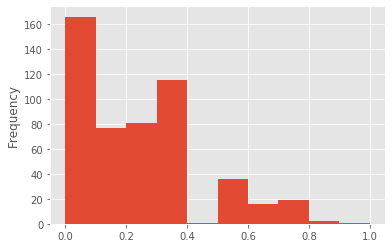

In [44]:
unique_styles['side_stone_weight'].plot.hist()

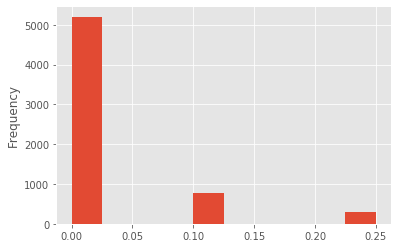

In [45]:
# popular = data[data['popular'] == True]
c.plot.hist()

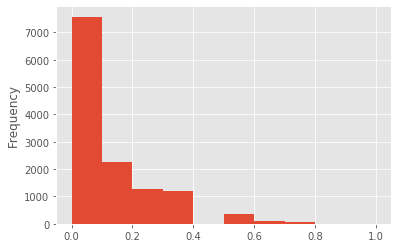

In [50]:
# non_popular = data[data['popular'] == False]
data['side_stone_weight'].plot.hist()

Apparently the most popular styles are the rings with less or no side stone on the band. The collections on BlueNile follows the trend, that approximately 50% styles are with less than 0.3 carat side diamonds. 

## Q1.3 What price range are the best sellers at?

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

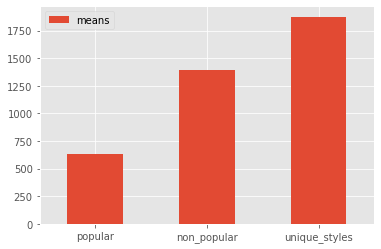

In [51]:
# print(popular.price.mean())
# print(non_popular.price.mean())
# print(data.price.mean())
# print(unique_styles.price.mean())
means = pd.DataFrame({'means':[629.06,1393.41,1874.20]},index=['popular','non_popular','unique_styles'])
means.plot.bar()
plt.xticks(rotation=0)

In [52]:
unique_styles[unique_styles['price']<=1000].shape[0]
unique_styles[unique_styles['price']<=1000].shape[0]/unique_styles.shape[0]

0.2490272373540856

Text(0.5, 1.0, 'Price for popular and non-popular styles')

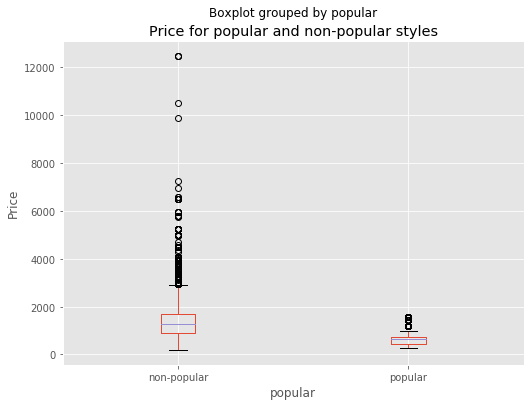

In [53]:
# plt.figure(figsize=(12,12))
# data['price'].plot.box()
data.boxplot(by='popular', column='price',figsize=(8,6))
plt.ylabel('Price')
plt.title('Price for popular and non-popular styles')

Text(0.5, 1.0, 'Price for gold types')

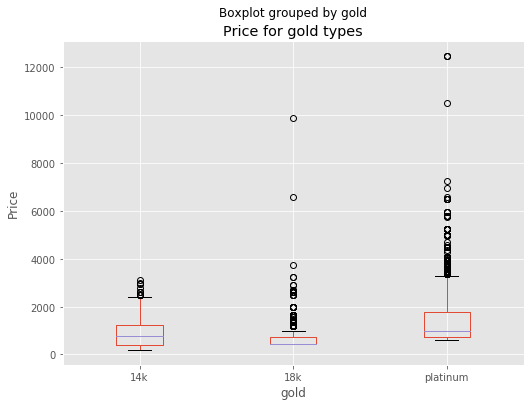

In [54]:
data.boxplot(by='gold', column='price',figsize=(8,6))
plt.ylabel('Price')
plt.title('Price for gold types')

Text(0.5, 1.0, 'Price for gold types')

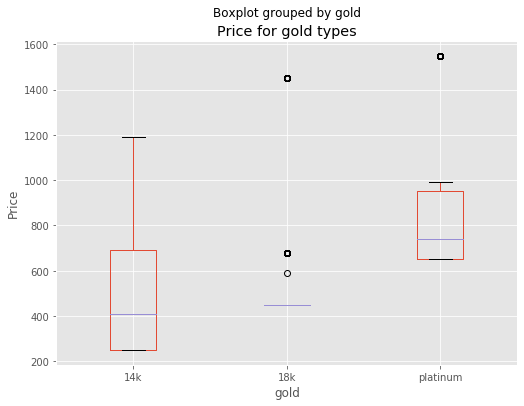

In [55]:
popular.boxplot(by='gold', column='price',figsize=(8,6))
plt.ylabel('Price')
plt.title('Price for gold types')

Text(0.5, 1.0, 'Prices for gold colors')

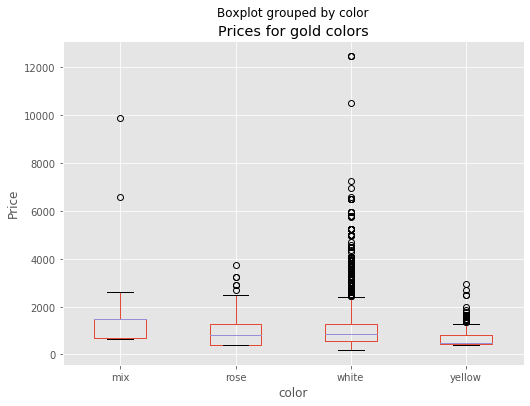

In [56]:
data.boxplot(by='color', column='price',figsize=(8,6))
plt.ylabel('Price')
plt.title('Prices for gold colors')

Text(0.5, 1.0, 'Prices for gold colors')

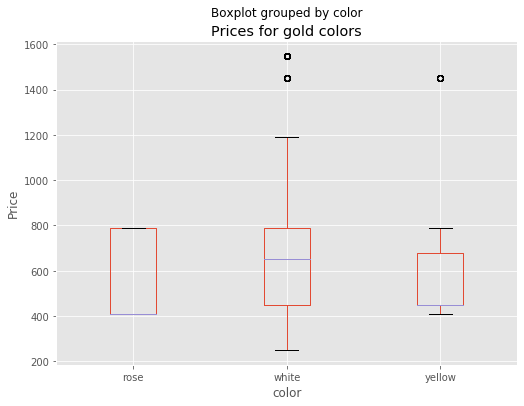

In [57]:
popular.boxplot(by='color', column='price',figsize=(8,6))
plt.ylabel('Price')
plt.title('Prices for gold colors')

Text(0.5, 1.0, 'Price for side stone sizes')

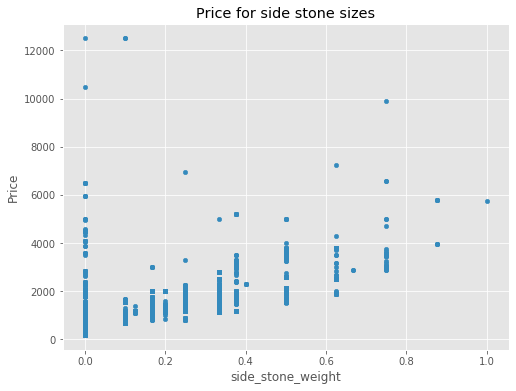

In [58]:
data.plot.scatter(x='side_stone_weight', y='price',figsize=(8,6))
plt.ylabel('Price')
plt.title('Price for side stone sizes')

In [59]:
# sns.lmplot("side_stone_weight", "price", data, hue="gold", palette="Set2")

## Q1.4 Have Customers choice changed over time? 

Text(0.5, 0, 'Dates of Reviews')

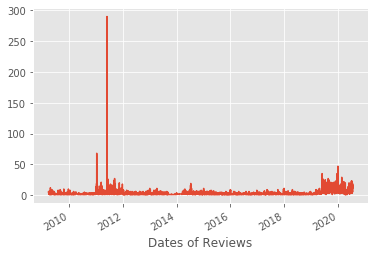

In [221]:
data['date'].value_counts().plot()
data['date'].value_counts().sort_index().nsmallest(10)
ts_data = data.set_index('date')
plt.xlabel('Dates of Reviews')

In [63]:
# data.loc[data['date']<=2012-12-31,'period'] = '09-12'
# data.loc[(data['date']>2012-12-31) & (data['date']<=2017-12-31),'period'] = '13-17'
# data.loc[data['date']>2017-12-31,'period'] = '18-20'
# data.period.value_counts()
year09_12 = ts_data['04/10/2009':'12/31/2012']
year09_12['period'] = '2009-2012'
year13_17 = ts_data['01/01/2013':'12/31/2017']
year13_17['period'] = '2013-2017'
year18_20 = ts_data['01/01/2018':]
year18_20['period'] = '2018-2020'

C:\Users\Chun\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Chun\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Chun\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [64]:
ts_combined = pd.concat([year09_12,year13_17,year18_20],axis=0)

In [80]:
ts_pop_combined = pd.concat([popular09_12,popular13_17,popular18_20],axis=0)

In [66]:
ts_combined.head()

,product_name,avg_rating,side_stone_weight,metal,user_name,verified,stars,price,location,expert_consulted,recommended,why_buy,popular,color,gold,period
date,,,,,,,,,,,,,,,,
2012-12-27,Classic Six-Prong Solitaire Engagement Ring,4.8,0,platinum,Adam,Verified Buyer,5,650,NaN,NaN,NaN,NaN,popular,white,platinum,2009-2012
2012-12-03,Classic Six-Prong Solitaire Engagement Ring,4.8,0,platinum,Anonymous,Verified Buyer,5,650,NaN,Yes,NaN,NaN,popular,white,platinum,2009-2012
2012-12-03,Classic Six-Prong Solitaire Engagement Ring,4.8,0,platinum,Sreeram,Verified Buyer,4,650,NaN,NaN,NaN,NaN,popular,white,platinum,2009-2012
2012-12-01,Classic Six-Prong Solitaire Engagement Ring,4.8,0,platinum,Anonymous,Verified Buyer,5,650,NaN,NaN,NaN,NaN,popular,white,platinum,2009-2012
2012-11-30,Classic Six-Prong Solitaire Engagement Ring,4.8,0,platinum,Angela,Verified Buyer,5,650,NaN,no,NaN,NaN,popular,white,platinum,2009-2012


In [67]:
by_period = ts_combined.groupby('period')
by_period.size()

period
2009-2012    3805
2013-2017    3414
2018-2020    5446
dtype: int64

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text xticklabel objects>)

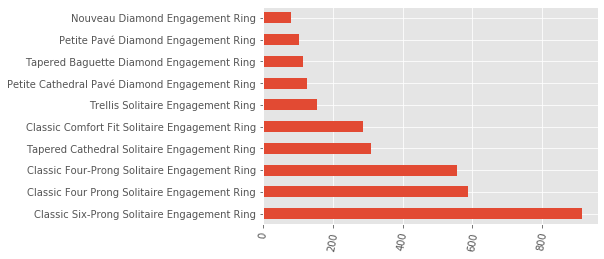

In [235]:
p1 = year09_12['product_name'].value_counts().nlargest(10).index.tolist()
year09_12['product_name'].value_counts().nlargest(10).plot(kind='barh')
plt.xticks(rotation=80)

In [75]:
style09_12 = year09_12['product_name'].value_counts().nlargest(10).index.tolist()
popular09_12= year09_12[year09_12['product_name'].isin(style09_12)]

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text xticklabel objects>)

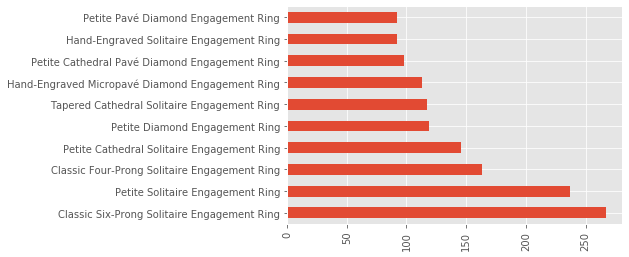

In [236]:
p2 = year13_17['product_name'].value_counts().nlargest(10).index.tolist()
year13_17['product_name'].value_counts().nlargest(10).plot(kind='barh')
plt.xticks(rotation=90)

In [77]:
style13_17 = year13_17['product_name'].value_counts().nlargest(10).index.tolist()
popular13_17 = year13_17[year13_17['product_name'].isin(style13_17)]

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text xticklabel objects>)

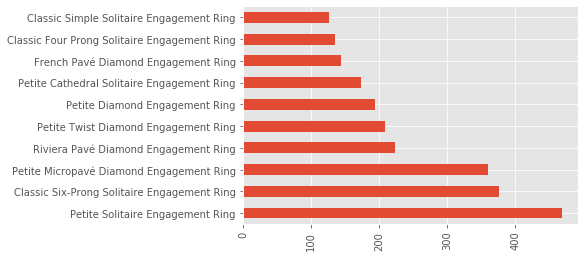

In [237]:
p3 = year18_20['product_name'].value_counts().nlargest(10).index.tolist()
year18_20['product_name'].value_counts().nlargest(10).plot(kind='barh')
plt.xticks(rotation=90)

In [243]:
print(list(set(p1) & set(p2)))
print(list(set(p2) & set(p3)))
print(list(set(p1) & set(p3)))
print(list(set(p1) & set(p2) & set(p3)))

['Classic Four-Prong Solitaire Engagement Ring', 'Tapered Cathedral Solitaire Engagement Ring', 'Petite Pavé Diamond Engagement Ring', 'Classic Six-Prong Solitaire Engagement Ring', 'Petite Cathedral Pavé Diamond Engagement Ring']
['Petite Solitaire Engagement Ring', 'Petite Diamond Engagement Ring', 'Petite Cathedral Solitaire Engagement Ring', 'Classic Six-Prong Solitaire Engagement Ring']
['Classic Six-Prong Solitaire Engagement Ring', 'Classic Four Prong Solitaire Engagement Ring']
['Classic Six-Prong Solitaire Engagement Ring']


In [79]:
style18_20 = year18_20['product_name'].value_counts().nlargest(10).index.tolist()
popular18_20 = year18_20[year18_20['product_name'].isin(style18_20)]

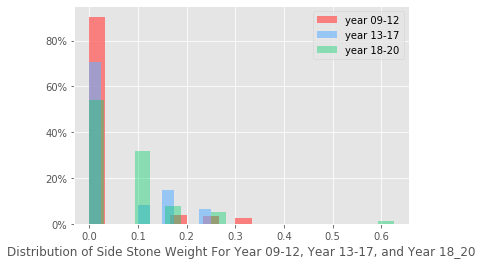

In [266]:
plt.hist(popular09_12['side_stone_weight'],color='#FF6666',weights=np.ones(len(popular09_12['side_stone_weight'])) / len(popular09_12['side_stone_weight']),label='year 09-12', alpha=0.8)
plt.hist(popular13_17['side_stone_weight'],color='#66B2FF',weights=np.ones(len(popular13_17['side_stone_weight'])) / len(popular13_17['side_stone_weight']),label='year 13-17', alpha=0.6)
plt.hist(popular18_20['side_stone_weight'],color='#00CC66',weights=np.ones(len(popular18_20['side_stone_weight'])) / len(popular18_20['side_stone_weight']),label='year 18-20', alpha=0.4,bins=20)

plt.legend(loc='upper right')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Distribution of Side Stone Weight For Year 09-12, Year 13-17, and Year 18_20')
plt.show()

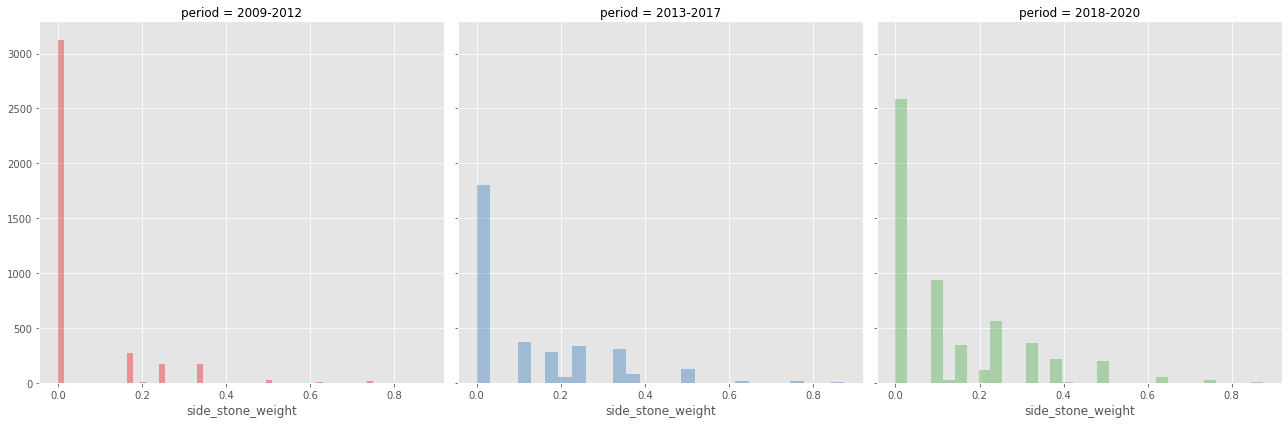

In [83]:
periodGrid = sns.FacetGrid(ts_combined, col='period', hue="period", palette="Set1", size=6)
periodGrid.map(sns.distplot, 'side_stone_weight', kde=False)

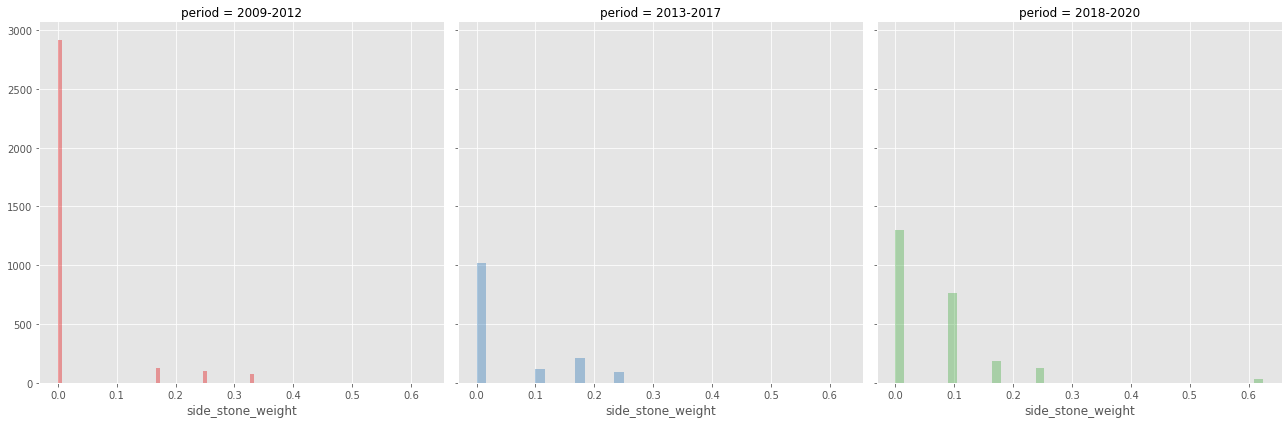

In [84]:
periodGrid = sns.FacetGrid(ts_pop_combined, col='period', hue="period", palette="Set1", size=6)
periodGrid.map(sns.distplot, 'side_stone_weight', kde=False)

Text(0.5, 1.0, 'Price Change From Year 09-12, Year 13-17, to Year 18_20')

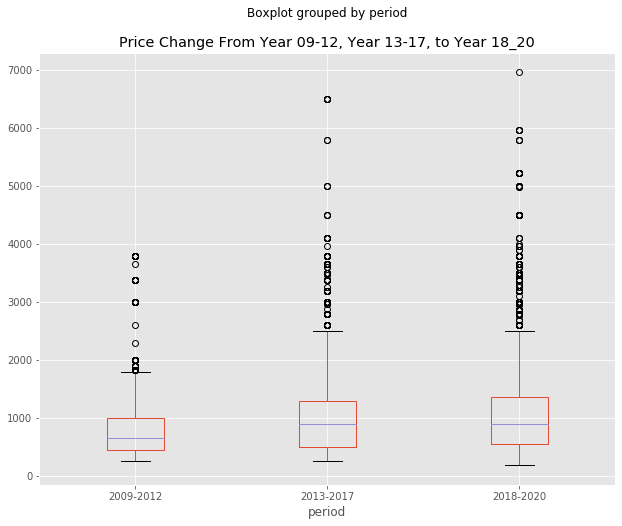

In [267]:
ts_combined.boxplot(by='period',column='price',figsize=(10,8))
plt.title('Price Change From Year 09-12, Year 13-17, to Year 18_20')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

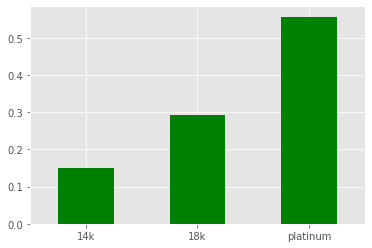

In [101]:
year09_12['gold'].value_counts(normalize=True).sort_values().plot(kind='bar',color='g')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

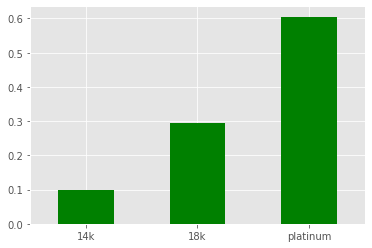

In [100]:
popular09_12['gold'].value_counts(normalize=True).sort_values().plot(kind='bar',color='g')
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

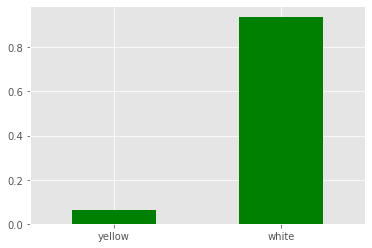

In [99]:
popular09_12['color'].value_counts(normalize=True).sort_values().plot(kind='bar',color='g')
plt.xticks(rotation=0)

C:\Users\Chun\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.



Text(0.5, 0.98, 'Gold Type Preference Changes From 2009 To 2020')

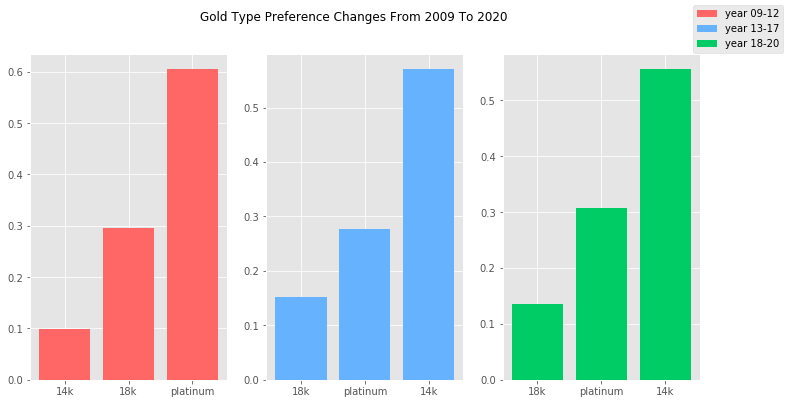

In [254]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.bar(popular09_12['gold'].value_counts(normalize=True).sort_values().index,popular09_12['gold'].value_counts(normalize=True).sort_values(),color='#FF6666',label='year 09-12')
ax2.bar(popular13_17['gold'].value_counts(normalize=True).sort_values().index,popular13_17['gold'].value_counts(normalize=True).sort_values(),color='#66B2FF',label='year 13-17')
ax3.bar(popular18_20['gold'].value_counts(normalize=True).sort_values().index,popular18_20['gold'].value_counts(normalize=True).sort_values(),color='#00CC66',label='year 18-20')

fig.legend(loc='best')
fig.suptitle('Gold Type Preference Changes From 2009 To 2020')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

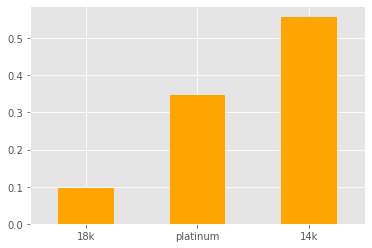

In [98]:
year13_17['gold'].value_counts(normalize=True).sort_values().plot(kind='bar',color='orange')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

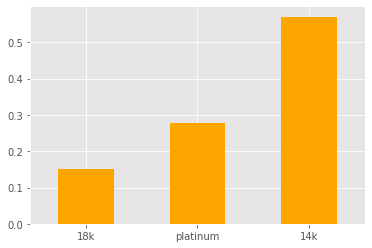

In [97]:
popular13_17['gold'].value_counts(normalize=True).sort_values().plot(kind='bar',color='orange')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

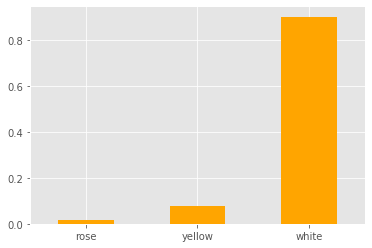

In [96]:
popular13_17['color'].value_counts(normalize=True).sort_values().plot(kind='bar',color='orange')
plt.xticks(rotation=0)

C:\Users\Chun\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning:

Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.



Text(0.5, 0.98, 'Gold Color Preference Changes From 2009 To 2020')

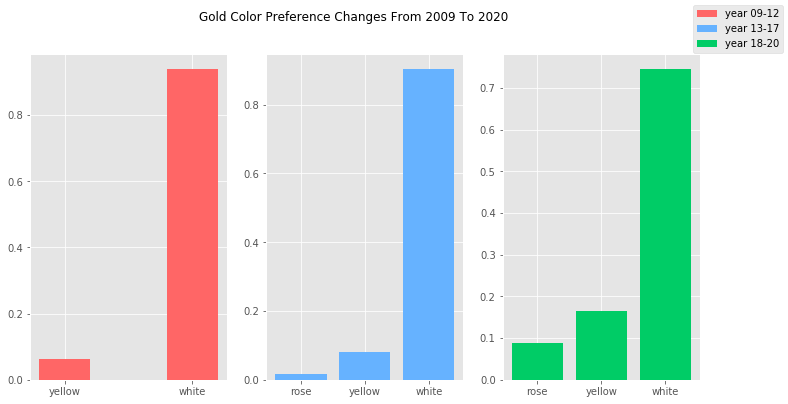

In [259]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.bar(popular09_12['color'].value_counts(normalize=True).sort_values().index,popular09_12['color'].value_counts(normalize=True).sort_values(),color='#FF6666',label='year 09-12',width=0.4)
ax2.bar(popular13_17['color'].value_counts(normalize=True).sort_values().index,popular13_17['color'].value_counts(normalize=True).sort_values(),color='#66B2FF',label='year 13-17')
ax3.bar(popular18_20['color'].value_counts(normalize=True).sort_values().index,popular18_20['color'].value_counts(normalize=True).sort_values(),color='#00CC66',label='year 18-20')

fig.legend(loc='best')
fig.suptitle('Gold Color Preference Changes From 2009 To 2020')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

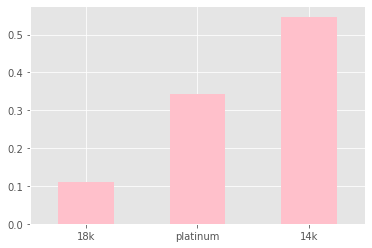

In [95]:
year18_20['gold'].value_counts(normalize=True).sort_values().plot(kind='bar',color='pink')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

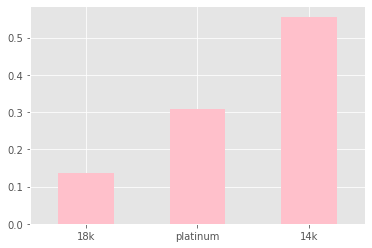

In [111]:
popular18_20['gold'].value_counts(normalize=True).sort_values().plot(kind='bar',color='pink')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

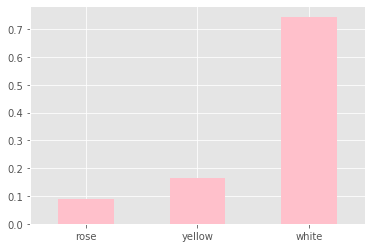

In [110]:
popular18_20['color'].value_counts(normalize=True).sort_values().plot(kind='bar',color='pink')
plt.xticks(rotation=0)

## Q1.5 Are there perferrence difference for customer segment?

In [102]:
data['location'].unique()

array(['Palmyra, USA', 'Fitchburg, USA', 'SEVERANCE, USA', ...,
       'TEMPLE CITY, USA', 'Issaquah, USA', 'locust grove, USA'],
      dtype=object)

In [103]:
pattern = r'.+, ([\w\s]+)'
np.sum(data['location'].str.extract(pattern).isnull())
data['location'] = data['location'].str.extract(pattern)

In [104]:
data.loc[data['location']=='USA','is_usa'] = 'USA'
data.loc[(~data['location'].isnull()) & (data['location']!='USA'),'is_usa'] = 'NON_USA'
data.loc[data['location'].isnull() ,'is_usa'] = None

In [105]:
data['is_usa'].value_counts()

USA        3217
NON_USA     252
Name: is_usa, dtype: int64

In [106]:
overseas = data[data['is_usa']=='NON_USA']

In [107]:
overseas['product_name'].value_counts().nlargest(10)

Classic Six-Prong Solitaire Engagement Ring           29
Petite Solitaire Engagement Ring                      23
Petite Micropavé Diamond Engagement Ring              18
Classic Simple Solitaire Engagement Ring              15
Classic Four Prong Solitaire Engagement Ring          11
Petite Cathedral Solitaire Engagement Ring            10
Riviera Pavé Diamond Engagement Ring                  10
Petite Diamond Engagement Ring                        10
Petite Nouveau Six-Prong Solitaire Engagement Ring     8
French Pavé Diamond Engagement Ring                    7
Name: product_name, dtype: int64

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

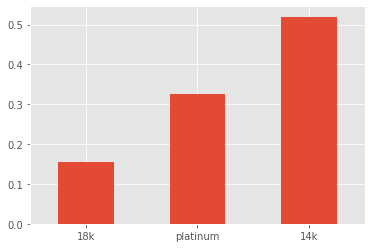

In [108]:
overseas['gold'].value_counts(normalize=True).sort_values().plot(kind='bar')
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

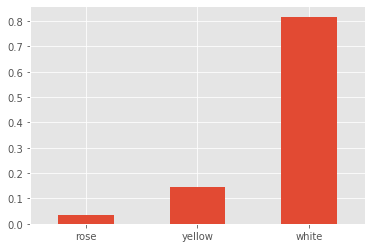

In [109]:
overseas['color'].value_counts(normalize=True).sort_values().plot(kind='bar')
plt.xticks(rotation=0)

Text(0.5, 1.0, 'Side Stone Weight Distribution For Overseas Market')

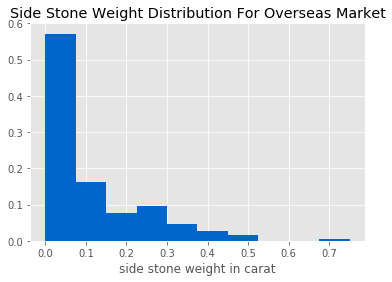

In [271]:
# overseas['side_stone_weight'].plot.hist()
plt.hist(overseas['side_stone_weight'],color='#0066CC',weights=np.ones(len(overseas['side_stone_weight'])) / len(overseas['side_stone_weight']))
plt.xlabel('side stone weight in carat')
plt.title('Side Stone Weight Distribution For Overseas Market')

Text(0.5, 0, 'Customer Segment')

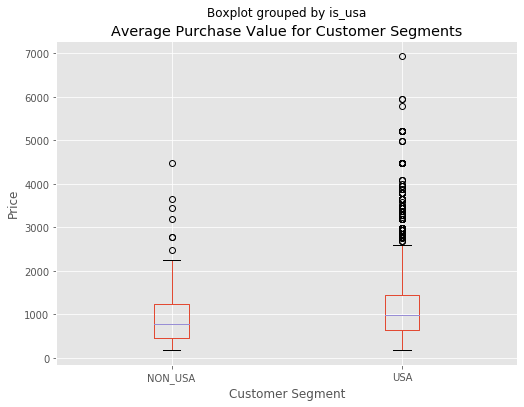

In [268]:
data.boxplot(by='is_usa', column='price',figsize=(8,6))
plt.ylabel('Price')
plt.title('Average Purchase Value for Customer Segments')
plt.xlabel('Customer Segment')

## Q2.1 Do customers rate popular styles higher too?

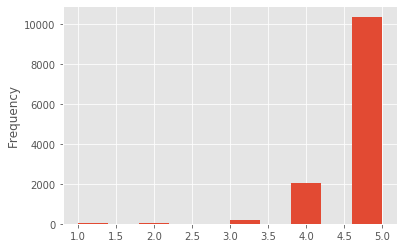

In [114]:
# data['stars'].value_counts()
data['stars'].plot.hist()

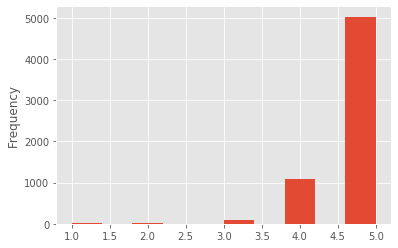

In [115]:
popular['stars'].mean()
popular['stars'].plot.hist()

4.867885334441213


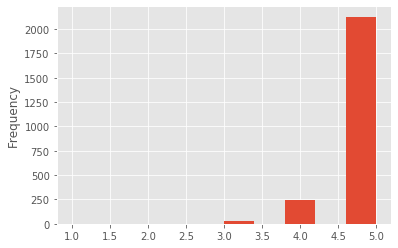

In [116]:
print(popular18_20['stars'].mean())
popular18_20['stars'].plot.hist()

C:\Users\Chun\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Chun\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Chun\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

Text(0.5, 1.0, 'Ratings for popular and non-popular styles')

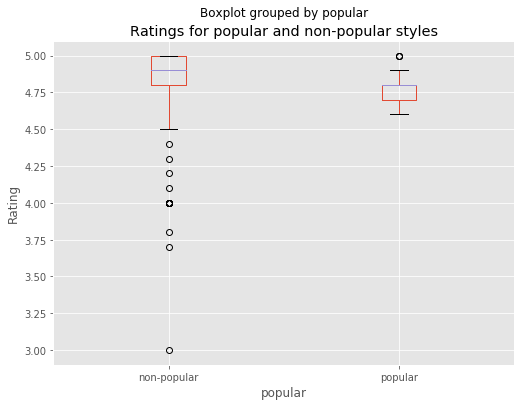

In [130]:
unique_styles.loc[data['product_name'].isin(popular_styles),'popular'] = 'popular'
unique_styles.loc[~data['product_name'].isin(popular_styles),'popular'] = 'non-popular'
unique_styles.boxplot(by='popular', column='avg_rating',figsize=(8,6))
plt.ylabel('Rating')
plt.title('Ratings for popular and non-popular styles')

In [131]:
unique_styles.groupby(['popular']).size()

popular
non-popular    481
popular         34
dtype: int64

## Q2.2 Do customers recommend their purchase?

## Q2.3 Why do customer buy on Bluenile?

In [132]:
data['recommended'].value_counts()

Yes    4236
No       35
Name: recommended, dtype: int64

In [135]:
not_recommended = data[data['recommended']=='No']

In [136]:
not_recommended.groupby(['popular']).size()

popular
non-popular    21
popular        14
dtype: int64

In [137]:
not_recommended.stars.mean()

3.2285714285714286

In [138]:
not_recommended['why_buy'].value_counts()

Value                  8
Selection              6
GIA graded diamonds    3
Other                  3
Quality                3
Education tips         2
Name: why_buy, dtype: int64

In [142]:
data['why_buy'].value_counts()

Value                                             1124
Quality                                            839
Selection                                          582
GIA graded diamonds                                340
Discussion with a diamond jewelry consultant       102
Other                                               91
Education tips                                      72
Discussion with a diamond jewellery consultant      14
Videos                                               5
Name: why_buy, dtype: int64

In [141]:
year18_20['why_buy'].value_counts().nlargest(3)

Value        1124
Quality       839
Selection     582
Name: why_buy, dtype: int64

## Bonus: Are people still proposing during COVID19?

In [157]:
covid = ts_combined['3/15/2020':]
b4_covid = ts_combined['1/1/2019':'3/15/2020']

In [158]:
# import datetime
# b4_days = (datetime.datetime('3/14/2020') - datetime.datetime('04/10/2009') )/ pd.offsets.Day(1)
b4_days = pd.to_datetime('3/14/2020') - pd.to_datetime('1/1/2019')
b4_covid.shape[0]/b4_days.days

8.445205479452055

In [159]:
covid_days = pd.to_datetime('7/25/2020') - pd.to_datetime('3/15/2020')
covid.shape[0]/covid_days.days

8.583333333333334

Text(0.5, 1.0, 'Review # Before And During COVID-19')

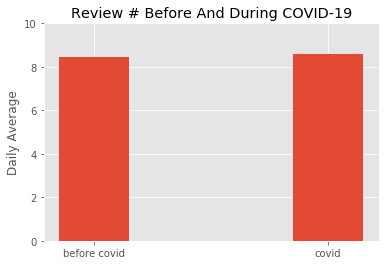

In [286]:
plt.bar(['before covid','covid'],[b4_covid.shape[0]/b4_days.days,covid.shape[0]/covid_days.days], width=0.3,align='center')
plt.ylabel('Daily Average')
plt.ylim(0,10)
plt.title('Review # Before And During COVID-19')

The frenquency of reviews stay about the same level as the year before the COVID 19. People didn't let the unexpected situation change the pace of their life.

## Conclusion

### The most popular engagement ring styles

   1. White gold/Platinum is definite the mainstream. In recent years, rose gold start to raise but it is just a start. 
   
   2. For gold purity, 14K has beaten Platinum and become the no.1 choice for BlueNile customers. As the feature of the metal,14K is stronger than Platinum so the designers can make more complex and delicate details. 14K's lower price range also gives it a great edge.
   
   3. In general, customers still favor engagement band with minimum side stones setting. It could be a result of price point, or just for asesthtic reasons. However, there is a possible trend that people are considering styles with more side stone design, especially for overseas market. 
   
   4. The average price point for popular ring styles is lower than 1000. 
   
   
### Insights for Buyer/Designer and Sales team
   
   1. The engagement ring collections on the website follows the trend in purchasing in general. There are more selections for 14K and white gold. However, the website provide a wide selections of designs with more than 0.3 carat side stone setting, which is actually not top choices of customer. Those styles may bring the company more profit than no diamond bands, so we want to ensure there are enough options, so to encourage people buying those styles. But buyers/designers need to make sure that they don't keep to much stock of them to avoid loss.
   
  2. The analysis indicates the top reasons of purchasing are "Value, Quality, Collections". And obviously the customers are sensitive with price. Such advantages should be empasized and reinfrced in marketing campaigns and web designs.
  